Data Wrangling with Python



In [85]:
# Import libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import os
import twitter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Ignore ssl errors
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
##Read the HTML from the URL
topurl = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(topurl)

In [4]:
#Write a small function to check the status of web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1
    
    

In [5]:
status_check(response)

Success!


1

In [6]:
#Decode the response and pass on to BeautifulSoup for HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [10]:
#Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements

List_href=[] 
#Find href tags
for link in soup.find_all('a'): 
    #add items to the list
    List_href.append(link.get('href'))   

In [12]:
List_href[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [15]:
#Use regular expression to find the numeric digits in these links.These are the file number for the Top 100 books.

#Initialize empty list to hold the file numbers
booknum=[]
#19 to 118 has book numbers
for i in range(19,119):                      
    links=List_href[i]
    # Strip link from element
    links=links.strip()
    # regular expression to find numeric digits
    n=re.findall('[0-9]+', links)              
    if len(n)==1:
        # Add the number into list
        booknum.append(int(n[0]))                
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 2641, 145, 37106, 16389, 67979, 2701, 100, 6761, 394, 2160, 4085, 6593, 5197, 1259, 84, 1342, 46, 69324, 11, 25344, 1661, 345, 174, 1952, 98, 43, 1080, 2542, 64317, 20228, 76, 69323, 2591, 844, 1260, 1400, 4300, 2554, 28054, 5200, 69322, 74, 2600, 23, 1232, 1184, 120, 41, 69325, 55024, 69328, 408, 5740, 730, 6130, 51764, 244, 30254, 219, 2852, 35, 45, 514, 10007, 205, 158, 768, 1497, 4363, 35899, 36, 1727, 42108, 135, 3207, 236, 33283, 43453, 1399, 69329, 58585, 55, 69319, 996, 16, 2814]


In [18]:
#Use .text() method and print only first 2000 characters 
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-11-11254225
last 7 days1334422
last 30 days6171955



Top 100 EBooks yesterd

In [33]:
# Temp empty list of Ebook names
lst_titles_temp=[]
#List starts with A Room with a View by E. M.  Forster (6170)
start_idx=soup.text.splitlines().index('A Room with a View by E. M.  Forster (6170)')
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+i])

In [34]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [35]:
for l in lst_titles:
    print(l)

A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
Moby Dick
The Complete Works of William Shakespeare by William Shakespeare 
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
My Life 
Twenty Years After by Alexandre Dumas 
Frankenstein
Pride and Prejudice by Jane Austen 
A Christmas Carol in Prose
Pride and prejudice by Jane Austen 
Alice
The Scarlet Letter by Nathaniel Hawthorne 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Dracula by Bram Stoker 
The Picture of Dorian Gray by Oscar Wilde 
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Tale of Two Cities by Charles Dickens 
The Strange Case of Dr
A Modest Proposal by Jonathan Swift 
A Doll
The Great Gatsby by F
Noli Me Tangere by Jos
Adventures of Huckleberry Finn by Mark Twain 
Black Nick
Grimms
The Importance of

2. Data Wrangling with Python: Activity 10, page 295
Build your own movie database by reading from an API


In [59]:
import urllib.request, urllib.parse, urllib.error
import json


In [60]:
#Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable

with open('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/APIkey_Bogus_example.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']


The final URL to be passed should look like: http://www.omdbapi.com/?t=movie_name&apikey=secretapikey
Do the following,

Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable serviceurl (don't miss the ?)
Create a variable apikey with the last portion of the URL ("&apikey=secretapikey"), where secretapikey is your own API key (an actual code)
The movie name portion i.e. "t=movie_name" will be addressed later

In [61]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

Write a utility function print_json to print nicely the movie data from a JSON file (which we will get from the portal)
Here are the keys of a JSON file,

'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

In [69]:
# Write utility function called print_json to print the movie data from a JSON file(which we will get from the portal)

def print_json(json_data):
    mov_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
              'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
              'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in mov_keys:                            # Itterate over list of features
        if k in list(json_data.keys()):           # If movie has that feature, print it
            print(f"{k}: {json_data[k]}")

In [70]:
# Write utility function to download a poster

def dwnld_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    
    # Get the file extension
    file_ext=poster_url.split('.')[-1]
    
    # Read image from web
    poster_data=urllib.request.urlopen(poster_url).read()
    
    # Get the location in computer to store the poster file
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Create new directory if the directory does not exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+file_ext     # Get the file name/location
    f=open(filename, 'wb')                            # Open file in write mode
    f.write(poster_data)                              # Write web data into the file
    f.close()                                         # Close the file
    

In [73]:
# Write a function to search a movie by its name

def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey   
        print(url)                                                      
        ureq = urllib.request.urlopen(url)                              
        url_data = ureq.read()    
        # Load the data into JSON format
        json_data = json.loads(url_data)                                
        
        # Check the response
        if json_data['Response']=='True':
            print_json(json_data)                                       
            
            # Check to download poster
            if json_data['Poster']!='N/A':
                dwnld_poster(json_data)                                 
        
        else:
            print('Error Occurred: ',json_data['Error'])                
    
    except urllib.error.URLError as e:                                
        print(f"Error: {e.reason}")

In [86]:
search_movie("RRR")

http://www.omdbapi.com/?t=RRR&apikey=db052d38
Title: RRR
Year: 2022
Rated: Not Rated
Released: 25 Mar 2022
Runtime: 187 min
Genre: Action, Drama
Director: S.S. Rajamouli
Writer: Vijayendra Prasad, S.S. Rajamouli, Sai Madhav Burra
Actors: N.T. Rama Rao Jr., Ram Charan Teja, Ajay Devgn
Plot: A fictitious story about two legendary revolutionaries and their journey away from home before they started fighting for their country in the 1920s.
Language: Telugu, English
Country: India
Awards: 3 wins & 4 nominations
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '93%'}, {'Source': 'Metacritic', 'Value': '83/100'}]
Metascore: 83
imdbRating: 8.0
imdbVotes: 114,084
imdbID: tt8178634


In [87]:
search_movie("Random_error")

http://www.omdbapi.com/?t=Random_error&apikey=db052d38
Error Occurred:  Movie not found!


##Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)
b. Sign in to apps.twitter.com
c. Click “Create New App”
d. Give your app a name and description
e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment
f. Create an access token
g. You should receive a consumer key and a token
h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [93]:
!pip install python-twitter


In [1]:
#import twitter
api = twitter.Api(consumer_key='wnLqhUyjDaVsTIe4QPtAl6GlI', 
                  consumer_secret='krnOiPUlDetKC8zNQFvRRabaZN4fRfqJWkngUsVV1rI3gZjrDR',
                 access_token_key='1591884393248968704-h0PHYXzcL4DaiuUo6XwkN5Gl1JXV5I',
                 access_token_secret='t5VL03UGIx0kjW0dhhpMHJ36c2vwCooD5nEwaFPKSklKY')


NameError: name 'twitter' is not defined

In [96]:
print(api.VerifyCredentials())

{"created_at": "Sun Nov 13 20:03:32 +0000 2022", "default_profile": true, "description": "I am student created account for a project", "friends_count": 1, "id": 1591884393248968704, "id_str": "1591884393248968704", "name": "Kolluri vishnu", "profile_background_color": "F5F8FA", "profile_image_url": "http://pbs.twimg.com/profile_images/1591884490225352704/ZdS2abeO_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1591884490225352704/ZdS2abeO_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "VishnuKolluri", "withheld_in_countries": []}


In [99]:
# Search tweets containing 'Bellevue University'

api.GetSearch(term='Bellevue University', since=2022-1-1, count=10)

[Status(ID=1591848871508217857, ScreenName=BellevueU, Created=Sun Nov 13 17:42:00 +0000 2022, Text="In dedication of her late husband, Debra Parsow founded and continues to care for Omaha's Elmwood Park playground.… https://t.co/e2bcE1zbYw"),
 Status(ID=1591772627831762945, ScreenName=EduTeacherJobs, Created=Sun Nov 13 12:39:02 +0000 2022, Text='Peer Tutor - Graduate Statistics: Bellevue University (Bellevue, NE) https://t.co/C2YLEwL3YA'),
 Status(ID=1591770751149166593, ScreenName=EduTeacherJobs, Created=Sun Nov 13 12:31:35 +0000 2022, Text='Peer Tutor - Graduate Accounting: Bellevue University (Bellevue, NE) https://t.co/TOYvtewqff'),
 Status(ID=1591769234954416129, ScreenName=EduTeacherJobs, Created=Sun Nov 13 12:25:33 +0000 2022, Text='Peer Tutor - Finance: Bellevue University (Bellevue, NE) https://t.co/ayPxeFKD8i'),
 Status(ID=1591767596608946176, ScreenName=EduTeacherJobs, Created=Sun Nov 13 12:19:03 +0000 2022, Text='Peer Tutor - Data Science: Bellevue University (Bellevue, NE)

In [101]:
# Search tweets containing 'Musk'

api.GetSearch(term="Musk", since=2022-1-1, count=10)

[Status(ID=1591506697910374401, ScreenName=OccupyDemocrats, Created=Sat Nov 12 19:02:20 +0000 2022, Text='BREAKING: Horror legend Stephen King tweets that he “liked Twitter better in the pre-Musk days,” Musk replies with… https://t.co/HcOI0HhXoc'),
 Status(ID=1591703938159775745, ScreenName=JimMFelton, Created=Sun Nov 13 08:06:05 +0000 2022, Text='Elon Musk slowly finding out the most basic information about the platform he bought by getting fact-checked on it https://t.co/fQzpprbglP'),
 Status(ID=1591686071653654531, ScreenName=HanaMichels, Created=Sun Nov 13 06:55:06 +0000 2022, Text='My son, Elon Musk, loved to go down to the mines to tell the other children to work harder. Such a great manager!'),
 Status(ID=1591931107217666049, ScreenName=JimNE_Krickets, Created=Sun Nov 13 23:08:47 +0000 2022, Text="RT @stltoday: Opinion columnist Kevin McDermott writes Musk's Twitter moves are a a reminder that membership in the billionaires’ club does…"),
 Status(ID=1591931106315624450, ScreenNa

Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart

In [102]:
df = pd.read_csv('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/Boston_housing.csv')

In [103]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [105]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


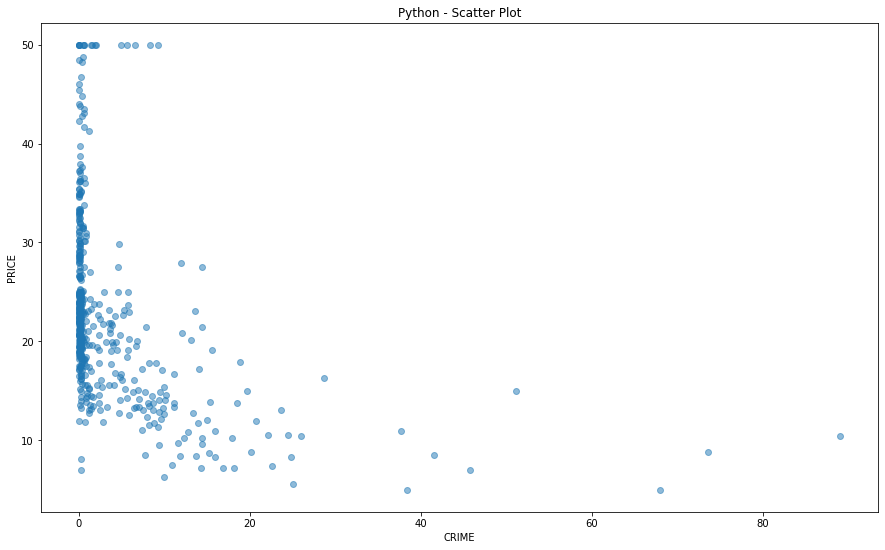

In [109]:

plt.figure(figsize=(15,9))
plt.scatter(df.CRIM, df.PRICE,alpha=0.5)
plt.title('Python - Scatter Plot')
plt.xlabel("CRIME")
plt.ylabel("PRICE");

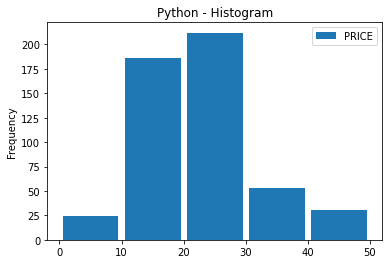

In [116]:

#Histogram
df[['PRICE']].plot(kind='hist',bins=[0,10,20,30,40,50],rwidth=0.9)
plt.title('Python - Histogram')
plt.show()

In [117]:
import seaborn as sns

[Text(0.5, 1.0, 'Python - Density Plot')]

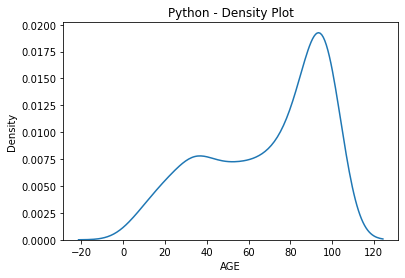

In [118]:
sns.kdeplot(df.AGE).set(title='Python - Density Plot')